In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.special import erf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten
import PIL

In [2]:

plt.rcParams["figure.figsize"] = (9, 6)

## Exercise 12.1 ##


In this exercise we will compare the results of a deep neural network and a convolutional neural network on the MNIST data set. We can start by loading the dataset:


In [3]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


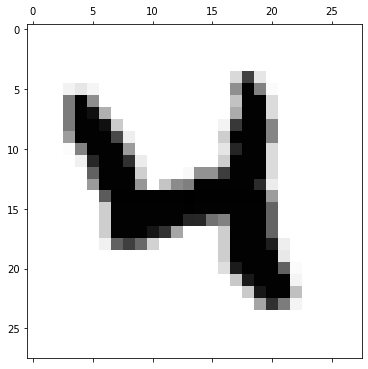

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Now we train the deep neural network. It will be constituted by 2 dense layer with 50 neuron each, a Dropout layer and a dense output layer, 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
def create_model(N1,N2):
    # instantiate model
    model_DNN = Sequential()
    # add a dense all-to-all relu layer
    model_DNN.add(Dense(N1,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model_DNN.add(Dense(N2, activation='relu'))
    # apply dropout with rate 0.5
    model_DNN.add(Dropout(0.5))
    # soft-max layer
    model_DNN.add(Dense(num_classes, activation='softmax'))
    return model_DNN

We train the DNN by using three different optimizers, the stochastic gradiend descend, Adam and Adadelta

In [6]:
# training parameters
batch_size = 32
epochs = 10
N1=50
N2=50

keras.backend.clear_session()
# train DNN and store training info in history
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
historySGD = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreSGD = model_DNN.evaluate(X_test, Y_test, verbose=1)

keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreAdam = model_DNN.evaluate(X_test, Y_test, verbose=1)


keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['acc'])
historyAdaDelta = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreAdaDelta = model_DNN.evaluate(X_test, Y_test, verbose=1)
model_DNN.summary()

313/313 [==============================] - 0s 1ms/step - loss: 0.1018 - acc: 0.9731
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


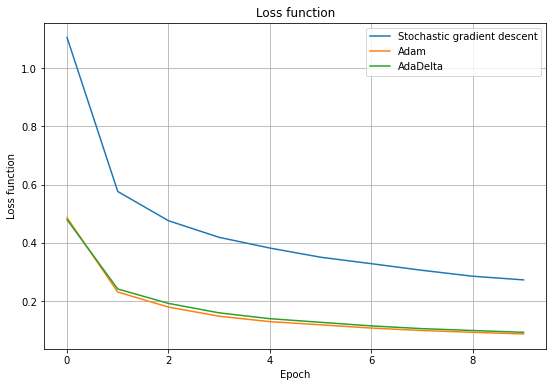

Text(0.5, 1.0, 'Accuracy')

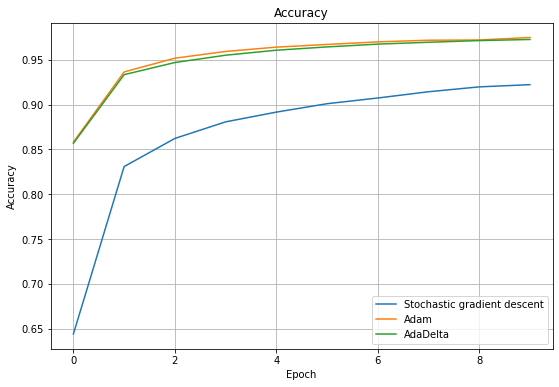

In [7]:
plt.plot(historySGD.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['loss'],label='Adam')
plt.plot(historyAdaDelta.history['loss'],label='AdaDelta')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['acc'],label='Adam')
plt.plot(historyAdaDelta.history['acc'],label='AdaDelta')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')

In [8]:
print(f"Con lo stochastic gradient descent la loss sui dati di test vale {scoreSGD[0]:0.3f} e l'accuracy vale {scoreSGD[1]:0.3f}")
print(f"Con Adam la loss sui dati di test vale {scoreAdam[0]:0.3f} e l'accuracy vale {scoreAdam[1]:0.3f}")
print(f"Con AdaDelta la loss sui dati di test vale {scoreAdaDelta[0]:0.3f} e l'accuracy vale {scoreAdaDelta[1]:0.3f}")

Con lo stochastic gradient descent la loss sui dati di test vale 0.160 e l'accuracy vale 0.951
Con Adam la loss sui dati di test vale 0.105 e l'accuracy vale 0.973
Con AdaDelta la loss sui dati di test vale 0.102 e l'accuracy vale 0.973


As we can see even with a small deep neural netowrk(two fully connected layers, 50 neurons each) we can see a good accuracy. We can wonder how better the network becomes if we make it bigger(for example by adding a layer and by duplicating the number of neurons)

In [9]:
# training parameters
batch_size = 32
epochs = 20
N1=100
N2=400

keras.backend.clear_session()
# train DNN and store training info in history
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
historySGD = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreSGD = model_DNN.evaluate(X_test, Y_test, verbose=1)

keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreAdam = model_DNN.evaluate(X_test, Y_test, verbose=1)


keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['acc'])
historyNadam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreNadam = model_DNN.evaluate(X_test, Y_test, verbose=1)
model_DNN.summary()

313/313 [==============================] - 0s 1ms/step - loss: 0.1242 - acc: 0.9792
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 400)               40400     
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 122,910
Trainable params: 122,910
Non-trainable params: 0
_________________________________________________________________


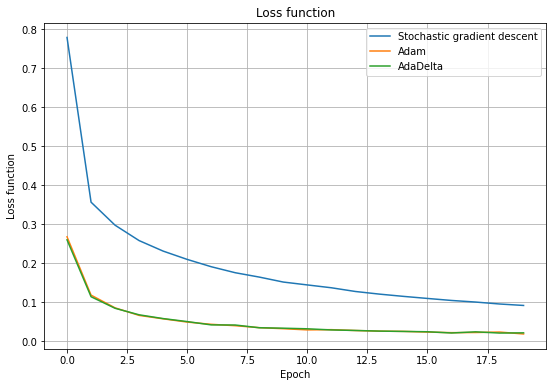

Text(0.5, 1.0, 'Accuracy')

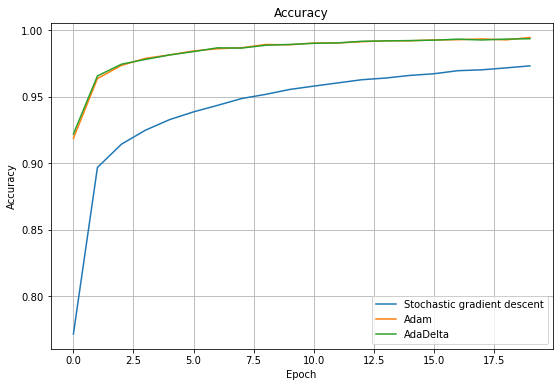

In [10]:
plt.plot(historySGD.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['loss'],label='Adam')
plt.plot(historyNadam.history['loss'],label='AdaDelta')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['acc'],label='Adam')
plt.plot(historyNadam.history['acc'],label='AdaDelta')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')


## Exercise 12.02 ##
We can now go on and use a convolutional neural network to classify the data. The convolutional neural network have the advantage of intrinsical translational invariance, and are widely used in image processing.
We use a network with two convolutional layers, two maxpooling layers (which operates a sort of coarse graining), a layer that flatten, a dropout layer and a dense output layer.

In [11]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
epochs=20
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [12]:
input_shape=(img_rows,img_cols,1)
#the CNN is formed by two convolutional layers, with 3X3 filter size
model_CNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [13]:
#train the convolutional neural network
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
wsave=model_CNN.get_weights()

historySGD_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
scoreSGD_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)
model_CNN.set_weights(wsave)

#do the same using ADAM as optimizer
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
wsave=model_CNN.get_weights()
historyAdam_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
scoreAdam_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 22s 11ms/step - loss: 2.5206 - acc: 0.2784 - val_loss: 1.2160 - val_acc: 0.7455
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9322 - acc: 0.6953 - val_loss: 0.4199 - val_acc: 0.8827
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6155 - acc: 0.8038 - val_loss: 0.3254 - val_acc: 0.9109
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5219 - acc: 0.8334 - val_loss: 0.2811 - val_acc: 0.9201
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4748 - acc: 0.8498 - val_loss: 0.2622 - val_acc: 0.9229
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4472 - acc: 0.8584 - val_loss: 0.2481 - val_acc: 0.9264
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4239 - acc: 0.8645 - val_loss: 0.2287 - val_acc: 0.9331
Epoch 8/20
1875/1875 [==========================

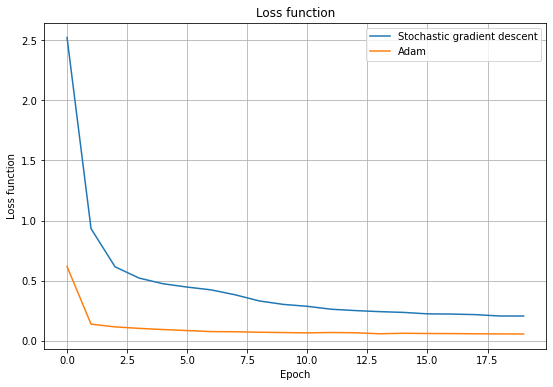

Text(0.5, 1.0, 'Accuracy')

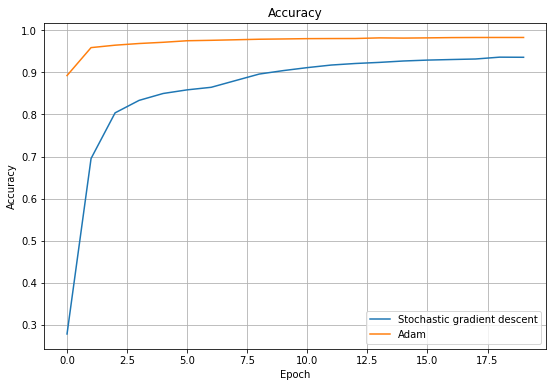

In [14]:
plt.plot(historySGD_CNN.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam_CNN.history['loss'],label='Adam')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD_CNN.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam_CNN.history['acc'],label='Adam')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')

As we can see both networks reach a higher accuracy than the deep neural networks counterpart, but we have to wonder whether the gain in accuracy, which is at most some percentage points, is worth the time we spent in training the neural netowrkds

313/313 [==============================] - 1s 3ms/step


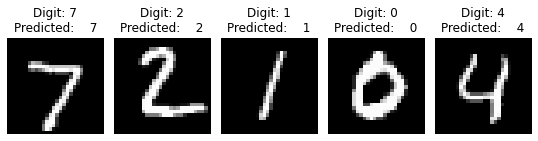

In [15]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(5):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

## Exercise 12.03 ##
In the end we can try to use the neural networks we just trained to see if they recognize some handwritten digits. To do so 

In [16]:
X_test_mine= np.zeros([27,28,28])
Y_test_mine= np.empty(27)
for i in range(1,10):
    for j in range(1,4):
        image = PIL.Image.open(f"./myImages/{i}%{j}.png").convert('L')
        array=np.asarray(image)
        X_test_mine[(i-1)*3+j-1]=array
        Y_test_mine[(i-1)*3+j-1]=i

Y_test_mine = keras.utils.to_categorical(Y_test_mine, num_classes)

1/1 [==============================] - 0s 115ms/step - loss: 0.5629 - acc: 0.8148


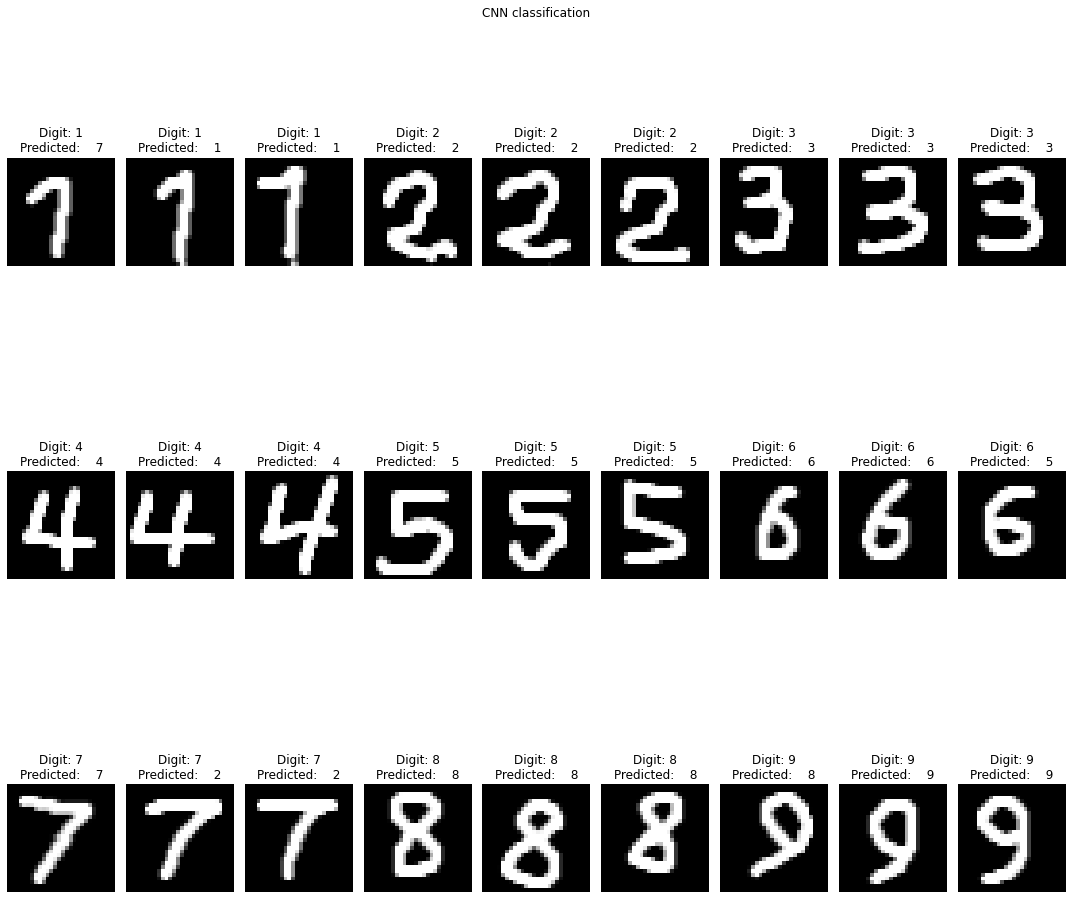

In [17]:
predictions = model_CNN.predict(X_test_mine)
score_CNN = model_CNN.evaluate(X_test_mine, Y_test_mine, verbose=1)
plt.figure(figsize=(15, 15)) 
for i in range(27):    
    ax = plt.subplot(3, 9, i + 1)    
    plt.imshow(X_test_mine[i], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test_mine[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.suptitle('CNN classification')
plt.show()

1/1 [==============================] - 0s 42ms/step


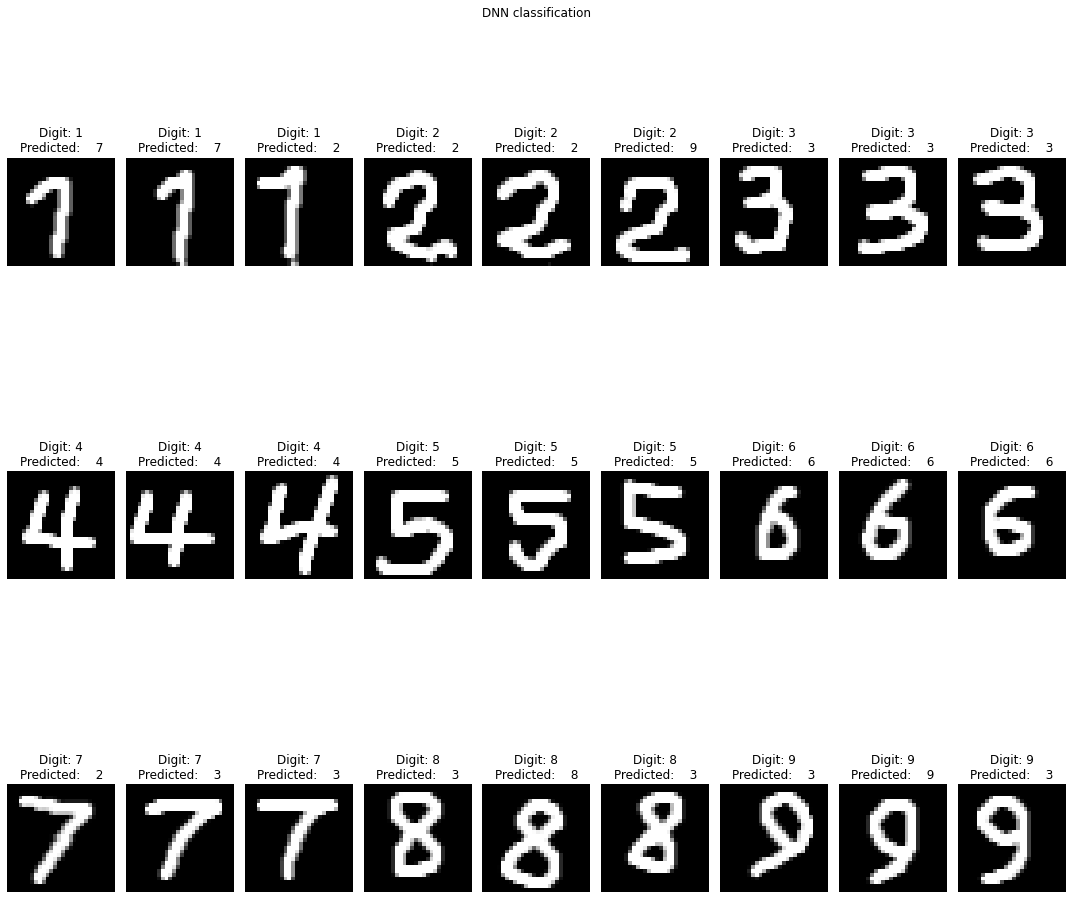

In [18]:

X_test_mine = X_test_mine.reshape(X_test_mine.shape[0], img_rows*img_cols)
score_DNN = model_DNN.evaluate(X_test_mine, Y_test_mine, verbose=1)
predictions = model_DNN.predict(X_test_mine)

plt.figure(figsize=(15, 15)) 
for i in range(27):    
    ax = plt.subplot(3, 9, i + 1)    
    plt.imshow(X_test_mine[i].reshape(img_rows,img_cols), cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test_mine[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.suptitle('DNN classification')
plt.show()

Here we see a notable result. While the CNN and the DNN reached an accuracy of $>0.95$ on the MNIST dataset, when introducing our handwritten digits the CNN retains an accuracy of $\approx 0.80$ while the DNN drops to an accuracy of $\approx 0.6$. These are not MNIST data, so they could be different from the data the networks are trained on (the pen might be larger, the white balance could be different, and so on), so we are effectively trying to extrapolate.
The CNN is more robust to this process.

##  Watching the filters #

We can try to see the filters of the convolutional layers. While the weights are not easy to understand to a human, but maybe the filters resemble some recognizable features of the numbers.

In [19]:
input_shape=(img_rows,img_cols,1)
#the CNN is formed by two convolutional layers, with 3X3 filter size
model_CNN2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(7, 7), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model_CNN2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

In [20]:
#train the neural network using ADAM as optimizer
model_CNN2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam_CNN2 = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0436 - val_acc: 0.9884
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0578 - acc: 0.9835 - val_loss: 0.0430 - val_acc: 0.9890
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0575 - acc: 0.9835 - val_loss: 0.0425 - val_acc: 0.9896
Epoch 4/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0521 - acc: 0.9847 - val_loss: 0.0400 - val_acc: 0.9892
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0594 - acc: 0.9830 - val_loss: 0.0402 - val_acc: 0.9894
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0536 - acc: 0.9843 - val_loss: 0.0432 - val_acc: 0.9883
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0546 - acc: 0.9841 - val_loss: 0.0380 - val_acc: 0.9891
Epoch 8/20
1875/1875 [==========================

In [21]:
scoreAdam_CNN2 = model_CNN.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0411 - acc: 0.9891


(7, 7, 1, 32)


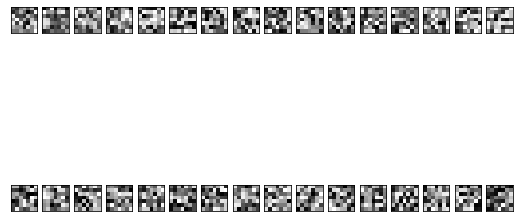

In [22]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN2.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(2,int(n_filters/2), ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

Here we don't see any recognizable feature

## Conclusions ##
In this notebook we explored the results of some simple deep and convolutional neural network on a standard dataset, the MNIST. There are countless possible improvements, this is an active research area. The easiest thing we could implement is data augmentation: we could take the dataset, operates some small transformation on the images and train the neural networks on this new dataset.
While we didn't put it in the final notebook, we also tried some other optimizers and to vary the learning rate. The effect are negligible on this dataset, which is sometimes called *the `hello world` of deep learning*, and we lack the knowledge to comment on the differences